In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("vgsales.csv")
df.dropna(how = "any",inplace = True)

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


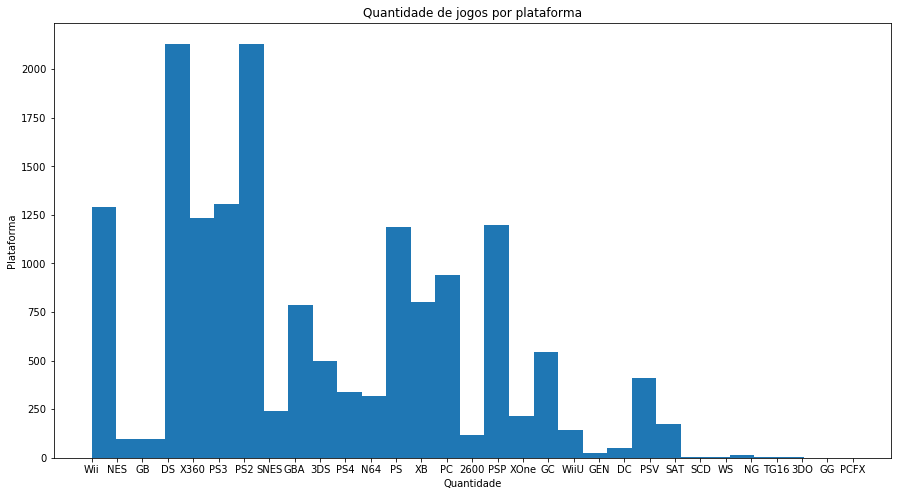

In [3]:
# Using Matplotlib calls

fig = plt.figure(figsize=(15,8))
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Variable
ax.hist(df["Platform"], bins = 31) # Here you can play with number of bins Labels and Tit

plt.title('Quantidade de jogos por plataforma')
plt.xlabel('Quantidade')
plt.ylabel('Plataforma')
plt.show()

As plataformas que mais tiveram variedade de jogos foram o Nintendo DS e o Playsation2. Ambos consoles de gerações mais antigas. Época em que a concorrência com o computador não era tão exaccerbada e que o tempo de produção de jogos não era tão alto quanto nos dias atuais. Ambos fatores contribuiram para tal variedade.

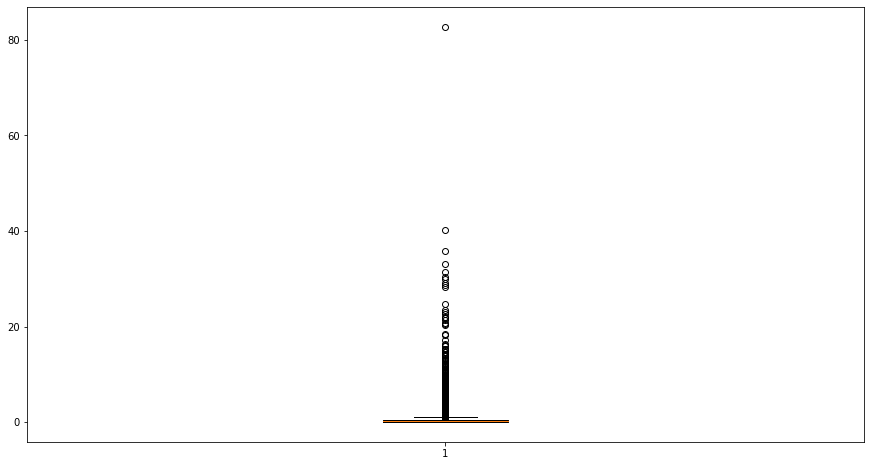

In [4]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.boxplot(df['Global_Sales'])
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


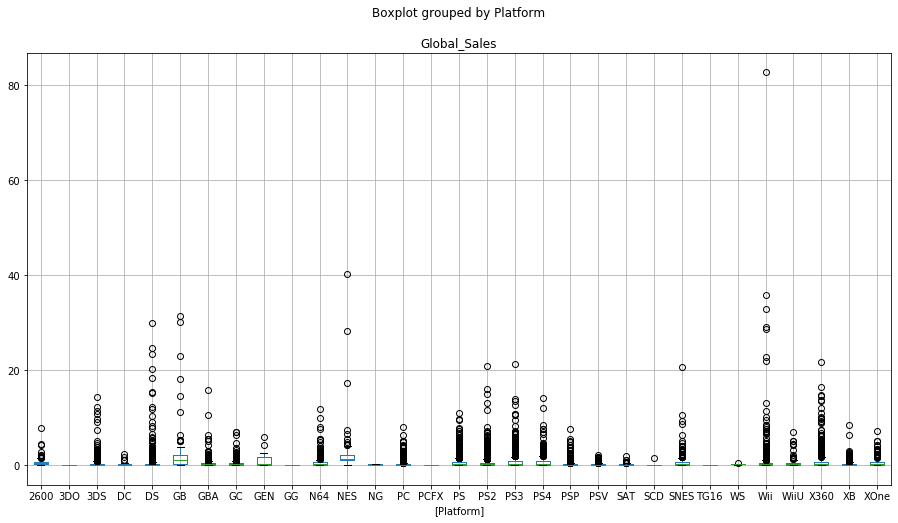

In [5]:
df[['Platform', 'Global_Sales']].boxplot(by='Platform', figsize=(15,8));

In [6]:
df2 = df[['Platform', 'EU_Sales', 'JP_Sales', 'NA_Sales']]
df2.head()

,Platform,EU_Sales,JP_Sales,NA_Sales
0,Wii,29.02,3.77,41.49
1,NES,3.58,6.81,29.08
2,Wii,12.88,3.79,15.85
3,Wii,11.01,3.28,15.75
4,GB,8.89,10.22,11.27


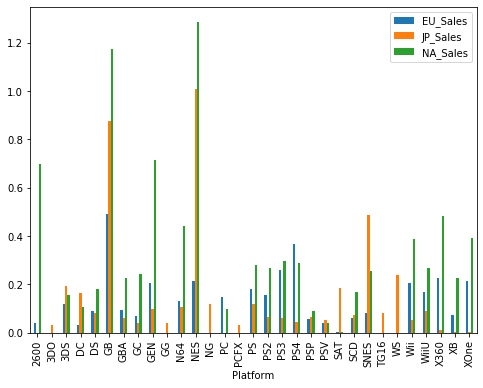

In [7]:
df2_group = df2.groupby('Platform').mean()
df2_group[['EU_Sales', 'JP_Sales', 'NA_Sales']].plot(kind='bar', figsize=(8,6))

## No fim das contas, qual plataforma vendeu mais? as da Sony, ou da Microsoft?


In [8]:
df3 = df2[(df2['Platform'].str.startswith('X')) | (df2['Platform'].str.startswith('PS'))]

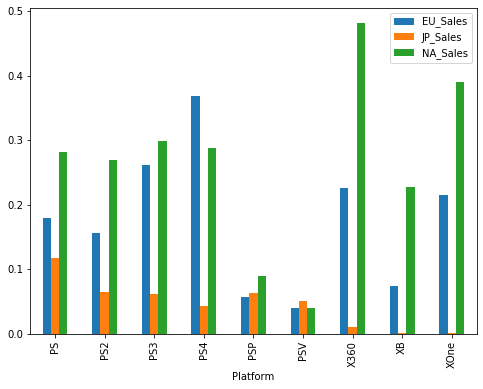

In [9]:
df3_group = df3.groupby('Platform').mean()
df3_group[['EU_Sales', 'JP_Sales', 'NA_Sales']].plot(kind='bar', figsize=(8,6))

Um primeiro ponto a se perceber nesse gráfico é que, com execeção do PS4 e o PSV, as vendas foram em maior parte na América do Norte. E o console mais popular por lá, foi o Xbox 360. Além disso, é notável que os console mais vendido da Microsoft e da Sony foram, respectivamente, o Xbox360 e o PS4

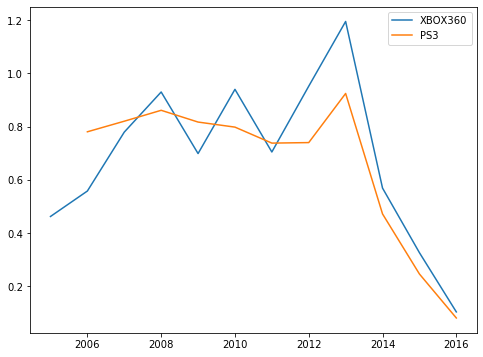

In [10]:
df4 = df[(df2['Platform'].str.startswith('X360'))].groupby(df['Year']).mean()
df5 = df[(df2['Platform'].str.startswith('PS3'))].groupby(df['Year']).mean()

fig = plt.figure( figsize=(8,6))
ax = plt.axes()
ax.plot(df4['Year'], df4['Global_Sales'], label = 'XBOX360')
ax.plot(df5['Year'], df5['Global_Sales'], label = 'PS3')
plt.legend()


Podemos observar que no geral, o XBOX360 vendeu mais que o PS3, com execeção do ano de 2009. Os dois consoles foram concorrentes diretos, mas o xbox se mostrou mais popular. Isso porvavelmente ocorreu devido à preços menores quando comparado com a plataforma da Sony (playstation).

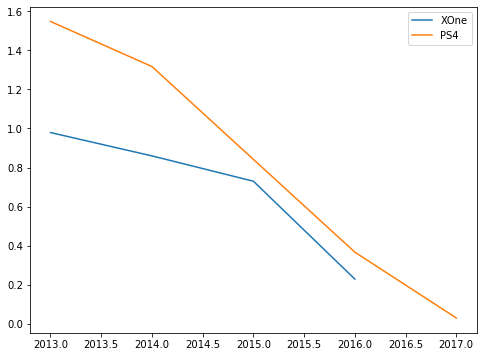

In [13]:
df4 = df[(df2['Platform'].str.startswith('XOne'))].groupby(df['Year']).mean()
df5 = df[(df2['Platform'].str.startswith('PS4'))].groupby(df['Year']).mean()

fig = plt.figure( figsize=(8,6))
ax = plt.axes()
ax.plot(df4['Year'], df4['Global_Sales'], label = 'XOne')
ax.plot(df5['Year'], df5['Global_Sales'], label = 'PS4')
plt.legend()


Porém na geração seguinte de consoles, o PS4 (da sony) ultrapassou o XboxOne(da Microsoft). Essa geração foi marcada com uma disputa direta entre consoles e computadores. Porém a Sony mantém jogos exclusivos que só podem ser jogados no PS4, fator esse que provavelmente garantiu que o videogame fosse mais vendido que o do concorrente.

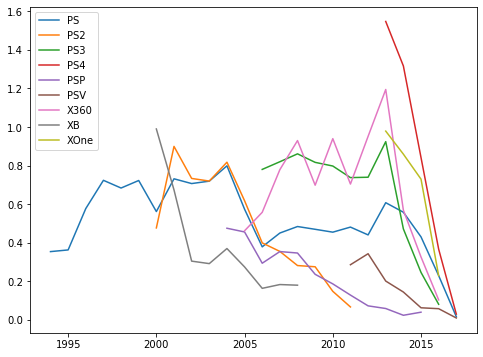

In [12]:
fig = plt.figure( figsize=(8,6))
ax = plt.axes()

for jogo in (df3_group.index.tolist()):
    df4 = df[(df2['Platform'].str.startswith(f'{jogo}'))].groupby(df['Year']).mean()
    ax.plot(df4['Year'], df4['Global_Sales'], label = f'{jogo}')
    plt.legend()